## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os.path as path
%matplotlib qt
%matplotlib inline

import helper

In [2]:
import camera_calibration
# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')
mtx, dist = camera_calibration.calibrate(images, 9, 6)

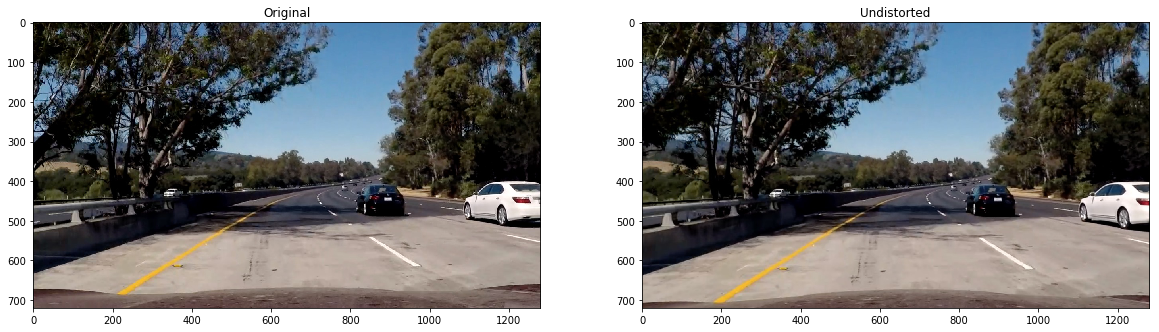

In [3]:
test_img = mpimg.imread('test_images/test5.jpg')
undistorted = camera_calibration.undistort(test_img, mtx, dist)

# Plotting undistorted images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Original')
ax1.imshow(test_img)

ax2.set_title('Undistorted')
ax2.imshow(undistorted)

In [4]:
# Step through the list and search for chessboard corners
# for fname in images:
#     img = cv2.imread(fname)
#     undistorted = camera_calibration.undistort(img, mtx, dist)
#     cv2.imwrite('output_images/calibrated/' + path.splitext(path.basename(fname))[0]+ '.jpg',undistorted)

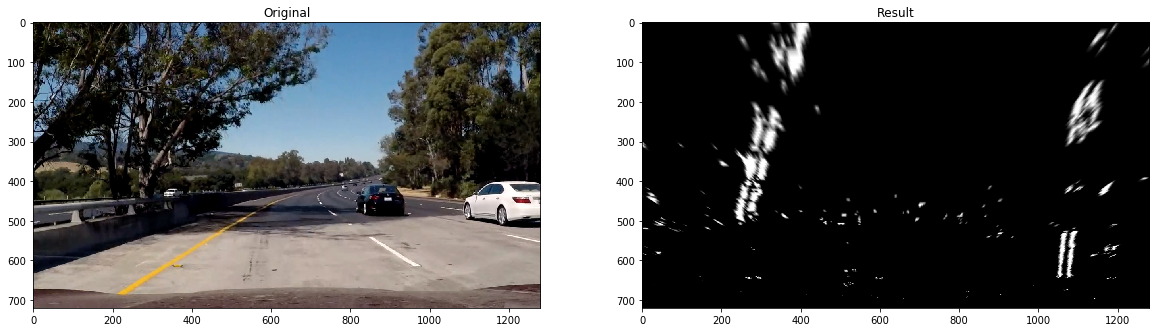

In [5]:
import threshold
import perspective_transform

undistorted = camera_calibration.undistort(test_img, mtx, dist)
binary_img = threshold.combined(undistorted, ksize=7, sobel_thresh=(20, 100), mag_thresh=(30, 100), dir_thresh=(0.7, 1.3))
warped, M, Minv = perspective_transform.unwarp(binary_img, mtx, dist)

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Original')
ax1.imshow(test_img)

ax2.set_title('Result')
ax2.imshow(warped, cmap='gray')

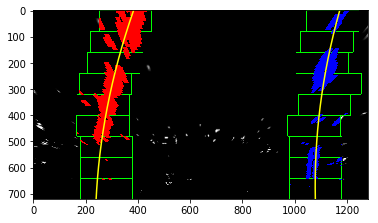

In [6]:
import lane_detector
out_img, left_fitx, right_fitx, ploty = lane_detector.fit_polynomial(warped)
plt.imshow(helper.clip_image(out_img, 1))

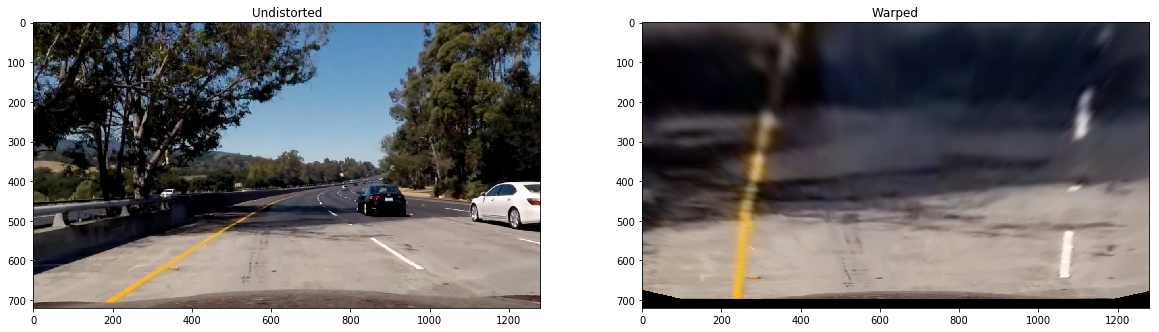

In [7]:
import visualization
warped, M, Minv = perspective_transform.unwarp(undistorted, mtx, dist)

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Undistorted')
ax1.imshow(undistorted)

ax2.set_title('Warped')
ax2.imshow(warped, cmap='gray')

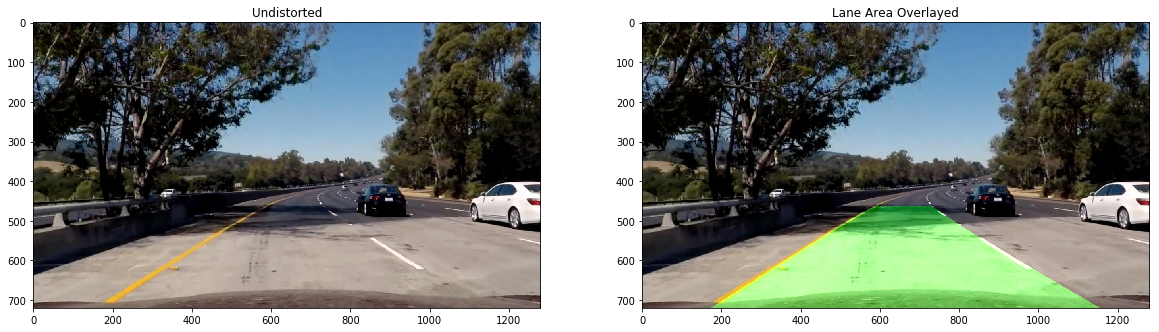

In [8]:
undistorted = helper.normalize_image(undistorted)
warped = helper.normalize_image(warped)

result = visualization.draw(warped, undistorted, left_fitx, right_fitx, ploty, Minv)

# Plotting thresholded images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Undistorted')
ax1.imshow(undistorted)

ax2.set_title('Lane Area Overlayed')
ax2.imshow(result)